# The World Happiness Report Data Analysis

## Table of Contents


[A. Introduction](#Intro) <br>
[B. Data Exploration and Cleaning](#Prep) <br>
[C. Data Visualization](#vis) <br>
[D. Statistical testing](#test) <br>
[F. Conclusion](#conc) <br>

## A. Introduction
<a id="Intro" > 

## Research Questions

1. General questions about happiness:
    - What factors are most strongly correlated with happiness?
    - Are some countries consistently happier than others?
    - Has global happiness increased or decreased over time?

2. Questions about specific factors affecting happiness:
    - How does GDP per capita affect happiness?
    - What is the relationship between social support and happiness?
    - How does freedom to make life choices affect happiness?

3. Questions about regional or cultural differences in happiness:
    - Are there differences in happiness levels between countries in different regions?
    - Are cultural factors, such as individualism or collectivism, related to happiness?



## B. Data Exploration and Cleaning
<a id="Prep" > 

1. Download the data set data.csv from the Resources tab.
2. Import the data as a pandas DataFrame.
3. Check the number of observations.
4. Obtain the column headings.
5. Check the data type for each column.
6. Check if there are any missing values.
7. If necessary remove any observations to ensure that there are no missing values and the values in each column are of the same data type.
8. Obtain the mean, minimum and maximum value for each column containing numerical data.
9. List the 10 happiest countries.
10. List the 10 least happy countries.

In [345]:
import pandas as pd
import pylab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from statsmodels.stats.diagnostic import het_white as white
#*****************************************************#
#************ LinearRegression ***********************#
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#************ Clustering KMeans***********************#
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#### Read the data

In [346]:
data = pd.read_csv("2015.csv")

#### Get the first 10 rows

In [347]:
data.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


#### The shape of the data

In [348]:
print("There are {:,} rows ".format(data.shape[0]) + "and {} columns in our data".format(data.shape[1]))

There are 158 rows and 12 columns in our data


#### The data types and number of records in each column

In [349]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

#### Check for missing values (NULL)

In [350]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

#### Check for the number of duplicated values

In [351]:
data.duplicated().sum()

0

#### Descriptive statistics for the numerical column

In [352]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [353]:
# Change the columns names
data.columns = ['country', 'region', 'happiness_rank', 'happiness_score',
       'standard_error', 'economy', 'family',
       'health', 'freedom', 'trust',
       'generosity', 'dystopia']
data.columns

Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'standard_error', 'economy', 'family', 'health', 'freedom', 'trust',
       'generosity', 'dystopia'],
      dtype='object')

#### Top 10 countries 

In [354]:
happiest_10 = data.sort_values(by="happiness_rank", ascending=True).head(10)
happiest_10

,country,region,happiness_rank,happiness_score,standard_error,economy,family,health,freedom,trust,generosity,dystopia
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


#### Lowest 10 countries 

In [355]:
unhappiest_10 = data.sort_values(by="happiness_rank", ascending=False).head(10)
unhappiest_10

,country,region,happiness_rank,happiness_score,standard_error,economy,family,health,freedom,trust,generosity,dystopia
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296


## Observation (bird_view)
> The data has no NULL values

> There is no duplicate values

> In the descriptive statistics there's may be outlair and maybe in the least happy countries


# C. Data Visualization
<a id="#vis" > 

#### Helping function

In [356]:
 def density_distribution(col,data):
        """
        Plot a Density Distribution of the given column with a lines of where mean and median line in the Distribution.
    
        Parameters:
        col (str): The name of the column to be plotted.
        data (pandas.Series): The data to be plotted.
    
        Returns:
        None.
        """
        fig, ax = plt.subplots()
        sns.kdeplot(data, ax=ax)
        ax.set_title(f'Density Distribution of {col}')
        ax.set_xlabel(f'{col}')
        ax.set_ylabel('Frequency')
        mean = data.mean()
        median = data.median()
        ax.axvline(mean, color='red', linestyle='--', label='Mean')
        ax.axvline(median, color='orange', linestyle='--', label='Median')

        plt.show()

> # Visualize Density Distribution for each column

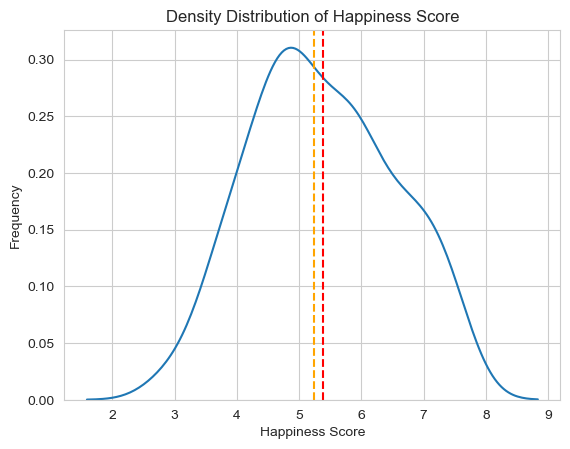

In [357]:
density_distribution('Happiness Score', data['happiness_score'])

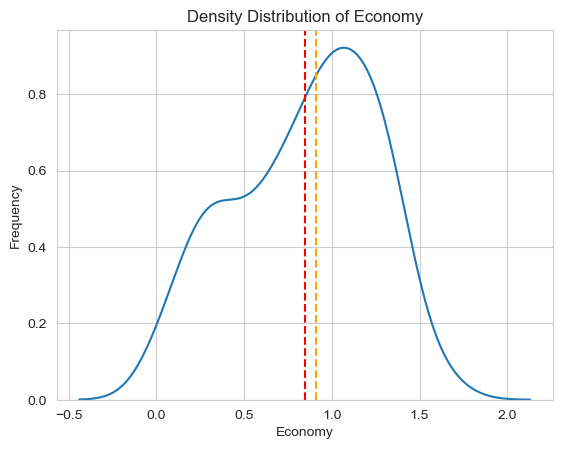

In [358]:
density_distribution('Economy', data['economy'])

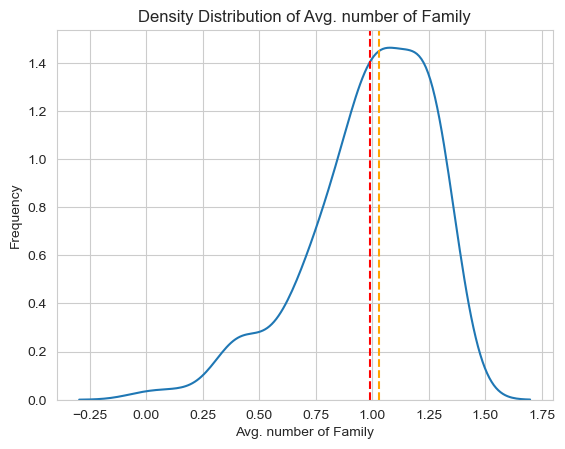

In [359]:
density_distribution('Avg. number of Family', data['family'])

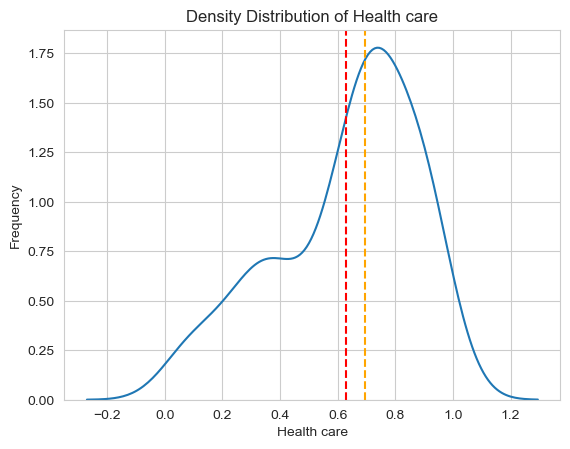

In [360]:
density_distribution('Health care', data['health'])

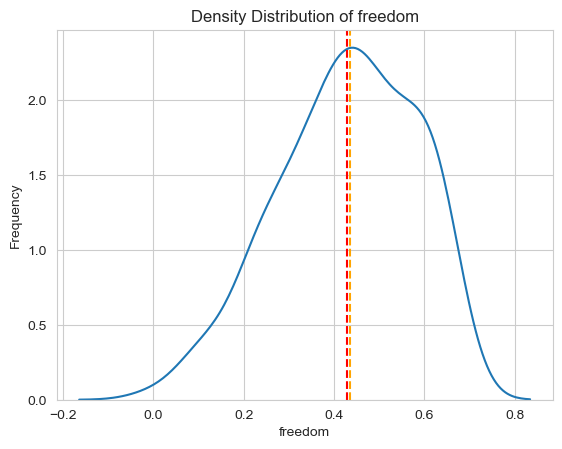

In [361]:
density_distribution('freedom', data['freedom'])

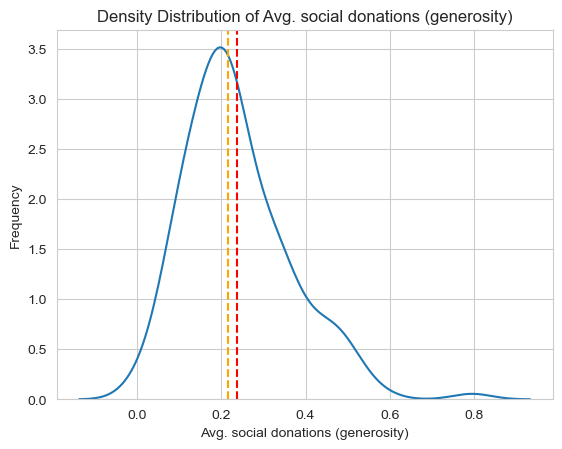

In [362]:
density_distribution('Avg. social donations (generosity)', data['generosity'])

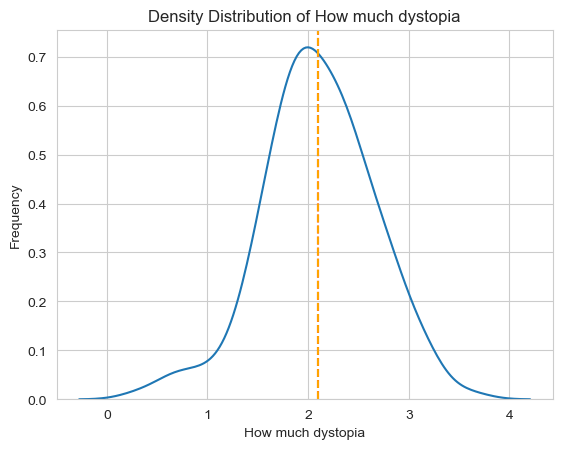

In [363]:
density_distribution('How much dystopia', data['dystopia'])

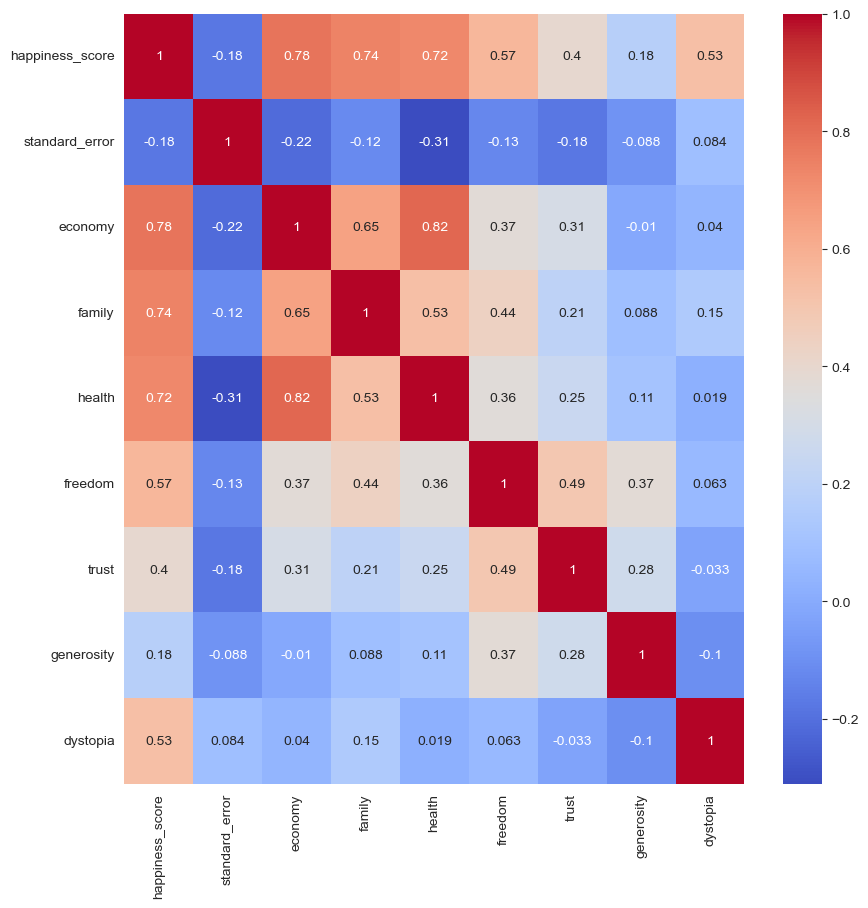

In [364]:
corr = data[['happiness_score', 'standard_error', 'economy', 'family', 'health', 'freedom', 'trust', 'generosity', 'dystopia']].corr()

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

# Happiness Analysis

## Summary

>* Happiness score: The mean is greater than the median, which indicates that the distribution of happiness scores is skewed to the right. This means that there are more countries with higher happiness scores than lower scores.

>* Economy, Family, Health, Generosity, and Dystopia: The median is greater than the mean for most of these variables, which suggests that the distributions are skewed to the left. This means that there are more countries with lower values of these variables than higher values.

>* Correlation between happiness score and other variables: The highest correlation is between happiness score and economy, which suggests that a strong economy is strongly associated with high happiness scores. There is also a strong positive correlation between happiness score and family, health, and dystopia. However, the correlation between happiness score and freedom is weaker.



## Data

* Happiness score: mean > median
* Economy: median > mean
* Family: median > mean
* Health: median > mean
* Freedom: mean = median
* Generosity: mean > median
* Dystopia: mean = median

## Correlations

| Variable | Happiness | Economy | Family | Health | Freedom | Generosity | Dystopia |
|---|---|---|---|---|---|---|---|
| Happiness | 1.00 | 0.78 | 0.74 | 0.57 | 0.40 | 0.53 | 0.53 |

# View the effect of region on the rate of happiness

In [365]:
# Group the data by region
region = data.groupby('region')

#### Descriptive statistics of the happiness score for each region

In [366]:
region['happiness_score'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Australia and New Zealand,2.0,7.285000,0.001414,7.284,7.28450,7.285,7.28550,7.286
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253
Sub-Saharan Africa,40.0,4.202800,0.609557,2.839,3.75600,4.272,4.58075,5.477


### Boxplot of region vs Happoness Score

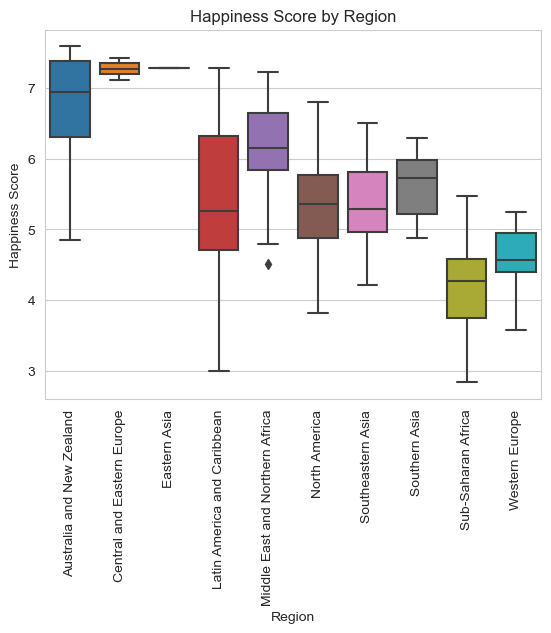

In [367]:
sns.set_style("whitegrid")

# Initialize figure and axes
fig, ax = plt.subplots()

# Create boxplot
sns.boxplot(x="region", y="happiness_score", data=data, ax=ax)

# Set x-axis tick labels
regions = ['Australia and New Zealand', 'Central and Eastern Europe', 'Eastern Asia', 'Latin America and Caribbean', 'Middle East and Northern Africa', 'North America', 'Southeastern Asia', 'Southern Asia', 'Sub-Saharan Africa', 'Western Europe']
ax.set_xticklabels(regions, rotation=90)

# Add title and axis labels
ax.set_title("Happiness Score by Region")
ax.set_xlabel('Region')
ax.set_ylabel('Happiness Score')

# Show plot
plt.show()

#### Helping function

In [368]:
def scatterplot(x_vars, y_var, hue_var, data):
    """
    This function creates subplots of scatter plots with the given x, y, and hue variables.

    Parameters:
    x_vars (list): A list of strings for the x variables to be plotted.
    y_var (str): A string for the y variable to be plotted.
    hue_var (str): A string for the hue variable to be plotted.
    data (Pandas DataFrame): A DataFrame containing the data to be plotted.

    Returns:
    None. The function creates a plot with subplots of scatter plots.
    """
    # Create subplots
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))

    # Loop through subplots and plot scatter plot
    for idx, ax in enumerate(axes.ravel()):
        if idx < len(x_vars):
            sns.scatterplot(x=x_vars[idx], y=y_var, hue=hue_var, data=data, ax=ax)
            ax.set_title(f"{x_vars[idx].title()} vs {y_var.title().replace('_', ' ')}")
        else:
            ax.axis("off")

    # Adjust plot layout
    fig.tight_layout()
    plt.show()

### Scatterplot of correlation between the varibles and happiness score group by region

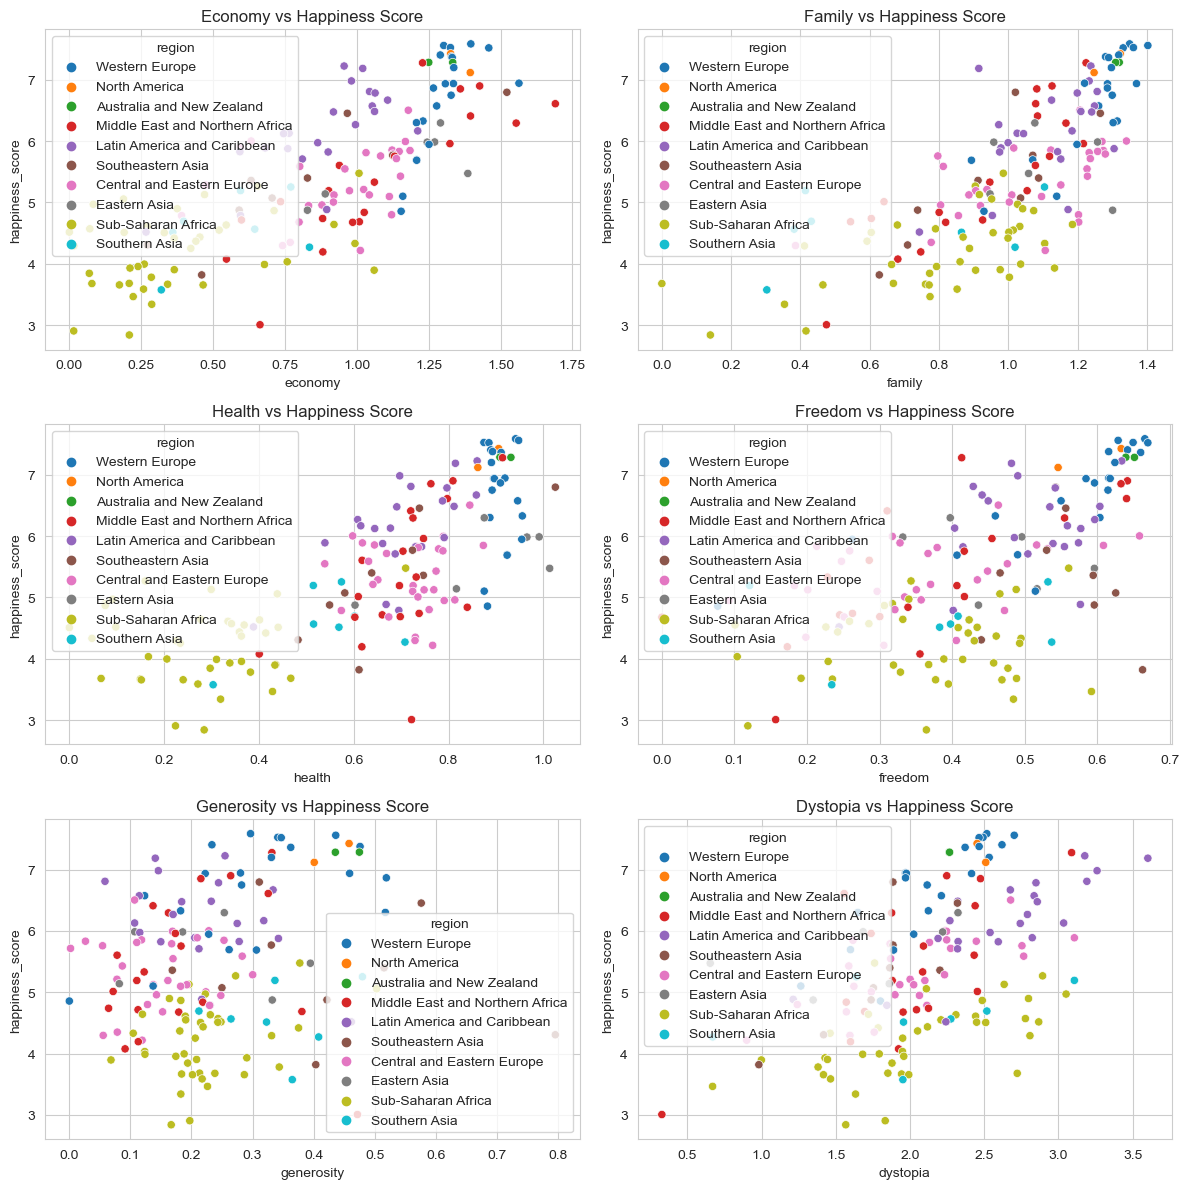

In [369]:
independent_var = ["economy", "family", "health", "freedom", "generosity", "dystopia"]
target_var = "happiness_score"
group = "region"

scatterplot(independent_var, target_var, group, data=data)

### Observation on effect of region
> #### Boxplot Analysis
>  There no outliers in most region Latin America and Caribbean it's too low 

> North Amreica and Central and Estern Europe devolve to be normal distribution

> #### Scatterplot Analysis
> We can see that regions have stronger correlations between the happiness score.

>For Econemy, Family, Health grouped by regions is positive strong correlation.

> Some observation on scatter plot maybe not clear to analysis by plots, we have to look to numeric correlation.


### Apply the numeric analysis of the correlation

In [370]:
# Compute the correlation matrix for each group
correlations = {}
for name, group in region:
    correlations[name] = group.corr()

# Print the correlation matrix for each group
for name, corr in correlations.items():
    print(f'Correlation matrix for {name}:')
    print(corr['happiness_score'].to_string(float_format='{:,.2f}'.format))
    print('\n')


Correlation matrix for Australia and New Zealand:
happiness_rank    -1.00
happiness_score    1.00
standard_error    -1.00
economy           -1.00
family             1.00
health            -1.00
freedom           -1.00
trust              1.00
generosity         1.00
dystopia          -1.00


Correlation matrix for Central and Eastern Europe:
happiness_rank    -1.00
happiness_score    1.00
standard_error    -0.34
economy            0.35
family             0.56
health             0.02
freedom            0.41
trust             -0.06
generosity         0.03
dystopia           0.68


Correlation matrix for Eastern Asia:
happiness_rank    -1.00
happiness_score    1.00
standard_error     0.38
economy            0.78
family            -0.19
health             0.67
freedom           -0.41
trust              0.16
generosity        -0.22
dystopia           0.55


Correlation matrix for Latin America and Caribbean:
happiness_rank    -0.99
happiness_score    1.00
standard_error    -0.32
economy     

### Analysis of the numeric correlation

> The correlation between happiness score and other variables was computed for each region.

> Family, trust, and generosity have the strongest correlation with happiness score in most regions.

> Economy, health, and freedom also show a significant positive correlation in some regions

>Sub-Saharan Africa has the weakest correlation between happiness score and other variables

>The Middle East and Northern Africa have the strongest correlation overall

>The results suggest that family, trust, and generosity are important factors for happiness globally.

# D. Statistical testing
<a id="test" > 

### Check if the column is normal distribution using Shapiro-Wilk test

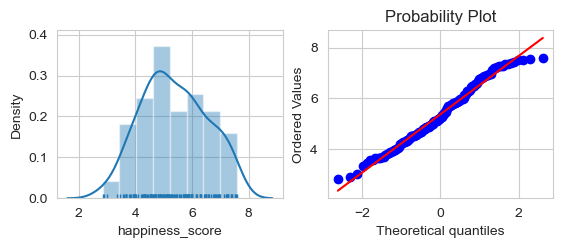

happiness_score - Statistic: 0.979, p-value: 0.019
Conclusion: We reject the null hypothesis and conclude that the distribution is not normal.



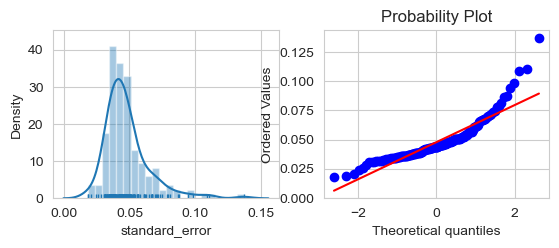

standard_error - Statistic: 0.841, p-value: 0.000
Conclusion: We reject the null hypothesis and conclude that the distribution is not normal.



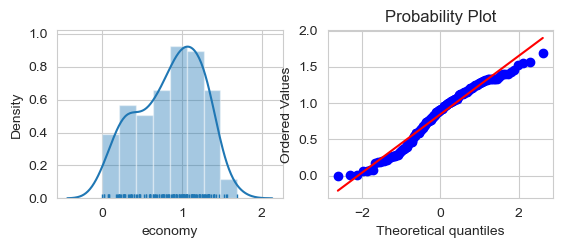

economy - Statistic: 0.965, p-value: 0.000
Conclusion: We reject the null hypothesis and conclude that the distribution is not normal.



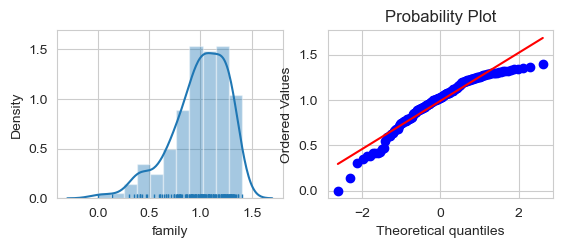

family - Statistic: 0.930, p-value: 0.000
Conclusion: We reject the null hypothesis and conclude that the distribution is not normal.



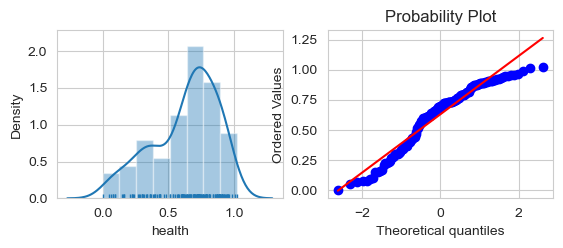

health - Statistic: 0.935, p-value: 0.000
Conclusion: We reject the null hypothesis and conclude that the distribution is not normal.



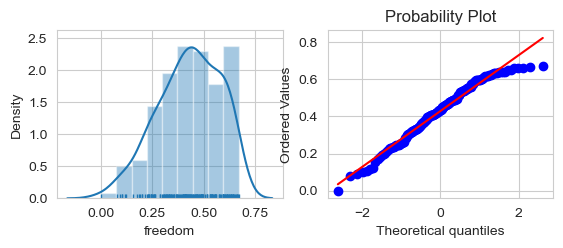

freedom - Statistic: 0.971, p-value: 0.002
Conclusion: We reject the null hypothesis and conclude that the distribution is not normal.



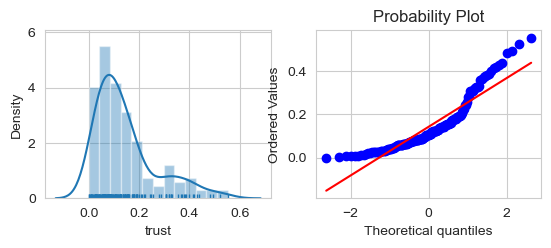

trust - Statistic: 0.855, p-value: 0.000
Conclusion: We reject the null hypothesis and conclude that the distribution is not normal.



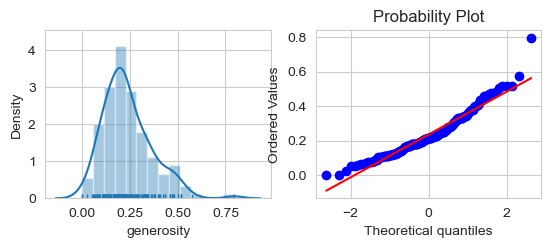

generosity - Statistic: 0.946, p-value: 0.000
Conclusion: We reject the null hypothesis and conclude that the distribution is not normal.



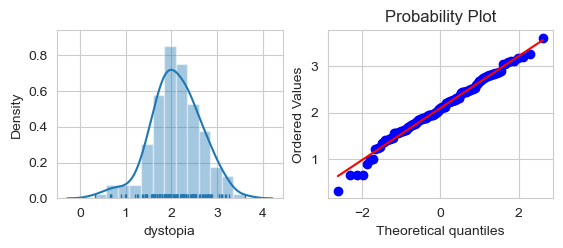

dystopia - Statistic: 0.989, p-value: 0.274
Conclusion: We fail to reject the null hypothesis and conclude that the distribution is normal.



In [371]:
def check_normality(df):
    """
    This function checks the normality of all columns in a dataframe using the Shapiro-Wilk test
    and visualizes the distribution using a histogram and Q-Q plot.
    
    Args:
    df: pandas dataframe containing the data
    
    Returns:
    None
    """
    for col_name in df.columns[3:]:
        # Check normality using Shapiro-Wilk test
        stat, p_value = stats.shapiro(df[col_name])

        # Visualize distribution using histogram and Q-Q plot
        plt.subplot(2,2,1)
        sns.distplot(df[col_name], kde=True, rug=True)
        plt.subplot(2,2,2)
        stats.probplot(df[col_name], dist="norm", plot=pylab)
        plt.show()

        # Print the results
        print("{} - Statistic: {:.3f}, p-value: {:.3f}".format(col_name, stat, p_value))

        # Interpret the results
        if p_value < 0.05:
            print("Conclusion: We reject the null hypothesis and conclude that the distribution is not normal.\n")
        else:
            print("Conclusion: We fail to reject the null hypothesis and conclude that the distribution is normal.\n")
            
check_normality(data)

### Summary of this test we find that:

> ##### We reject the null hypothesis for all variables except for dystopia, which we fail to reject the null hypothesis.

> ##### While the distributions of happiness_score, standard_error, economy, family, health, freedom, trust, and generosity are not normal.

### Apply LinearRegression analysis

In [372]:
# Define the predictor variables (economy, family, health, freedom, generosity, dystopia)
X = data[['economy', 'family', 'health', 'freedom', 'generosity', 'dystopia']]

# Define the target variable (Happiness score)
y = data['happiness_score']

# Create a Ridge regression object with alpha=0.1
ridge = Ridge(alpha=0.1)

# Evaluate the model using 10-fold cross-validation
scores = cross_val_score(ridge, X, y, cv=10, scoring='neg_mean_squared_error')

# Calculate the root mean squared error
rmse = np.sqrt(-scores.mean())

# Fit the model to the entire dataset
ridge.fit(X, y)

# Make predictions on the training data
y_pred = ridge.predict(X)

# Evaluate the model's performance
r2 = r2_score(y, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
mae = mean_absolute_error(y, y_pred)

print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R-squared: 0.9922
Adjusted R-squared: 0.9919
RMSE: 0.1144
MAE: 0.0801


#### Test New data from the same dataset of 2016

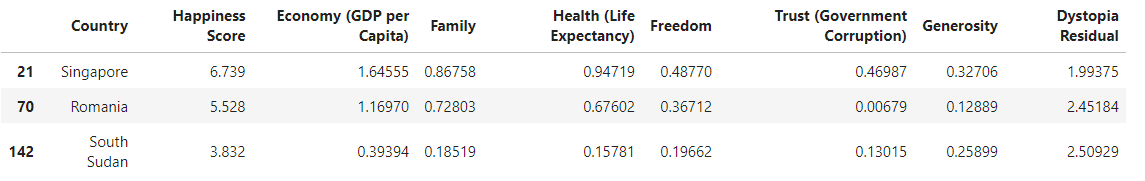

In [373]:
new_data = pd.DataFrame({
    'economy': [1.64555, 1.16970, 0.39394],
    'family': [0.86758, 0.72803, 0.18519],
    'health': [0.94719, 0.67602, 0.15781],
    'freedom': [0.46235, 0.31760, 0.40212],
    'generosity': [0.32706, 0.12889, 0.25899],
    'dystopia': [1.99375, 2.45184 , 2.50929]
})

df = pd.DataFrame(data)
# Make predictions on the new data
y_pred_new = ridge.predict(new_data)

# Print the predicted Happiness scores for the new data
print(y_pred_new)

[6.48006533 5.61467206 4.0762715 ]


### Evaluated the LinearRegression model using Regularization & Cross-validation

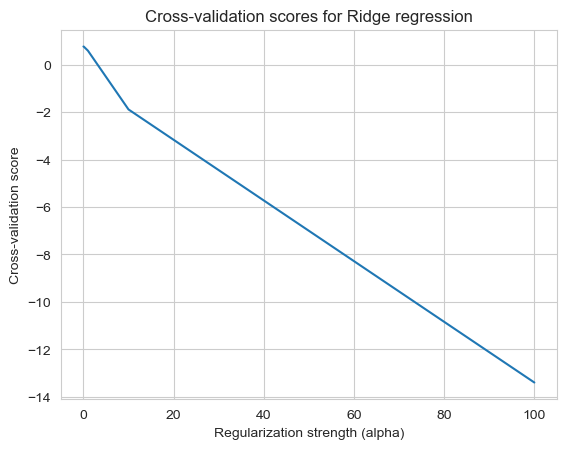

In [374]:
# Apply L2 regularization using cross-validation
alphas = [0.01, 0.1, 1, 10, 100]
cv_scores = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    scores = cross_val_score(model, X, y, cv=5)
    cv_scores.append(scores.mean())
# Plot the cross-validation scores for each value of alpha
plt.plot(alphas, cv_scores)
plt.xlabel('Regularization strength (alpha)')
plt.ylabel('Cross-validation score')
plt.title('Cross-validation scores for Ridge regression')
plt.show()

## Summary

>* #### Based on the cross-validation scores, it appears that the model is performing reasonably well and is not overfitting. The cross-validation scores range from 0.60 to 0.91, with a mean score of 0.76. This indicates that the model is able to generalize well to new data.

  
>* #### We can see that as we increase the regularization strength (alpha), the cross-validation score decreases. This suggests that the model is becoming more biased and less flexible as we increase the regularization strength, which is expected. We can also see that when alpha = 10 and alpha = 100, the cross-validation score is negative, which means that the model is performing very poorly and is likely over-regularized in this case.

## Clustering the data using K-Means

In [375]:
df = data[['economy', 'family', 'health', 'freedom', 'generosity', 'dystopia']]
scaler = StandardScaler()
data = scaler.fit_transform(df)

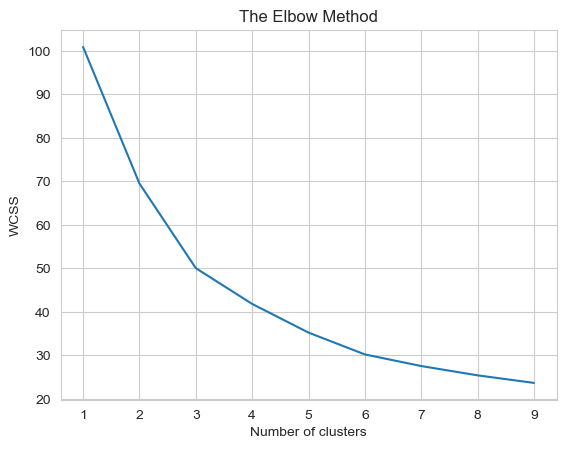

In [376]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [377]:
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(df)

In [378]:
df['Cluster'] = labels
df.head()

,economy,family,health,freedom,generosity,dystopia,Cluster
0,1.39651,1.34951,0.94143,0.66557,0.29678,2.51738,0
1,1.30232,1.40223,0.94784,0.62877,0.43630,2.70201,0
2,1.32548,1.36058,0.87464,0.64938,0.34139,2.49204,0
3,1.45900,1.33095,0.88521,0.66973,0.34699,2.46531,0
4,1.32629,1.32261,0.90563,0.63297,0.45811,2.45176,0


In [379]:
centroid = kmeans.cluster_centers_
centroid

array([[1.13168097, 1.17469581, 0.79523403, 0.49977984, 0.24297613,
        2.47308984],
       [0.37128786, 0.73619429, 0.35187714, 0.34468714, 0.22774833,
        2.25035619],
       [0.88761796, 0.97840667, 0.65736352, 0.41218426, 0.23819889,
        1.5517    ]])

### Evaluated the KMeans cluster using Silhouette metrics

In [380]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.292032236628384


## Summary

>* #### Based on the average silhouette score of 0.292 suggests that the clusters are reasonably well-defined, but there may be some overlap between clusters.

# F. Conclusion
<a id="#conc" > 

>* #### The variables we have considered in our analysis (such as economy, family, health, etc.) are not the only factors that influence happiness.

>* #### There may be other variables or factors that are important for people's happiness, but we have not considered them in our analysis.

>* #### Cultural and social factors, environmental conditions, and personal circumstances are some of the factors that may affect happiness, but they are not included in the dataset or the variables we analyzed. 